In [1]:
from math import log
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

In [2]:
!Pip install keras
!Pip install tensorflow

/bin/bash: Pip: command not found
/bin/bash: Pip: command not found


In [3]:
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential 
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils.np_utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [4]:
pip install adversarial-robustness-toolbox

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [5]:

from matplotlib.path import Path
from sklearn.utils import class_weight
from matplotlib.patches import PathPatchimport pprint
import pandas as pd
from sklearn import *
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from art.attacks.evasion import BasicIterativeMethod
from art.defences.postprocessor import ReverseSigmoid
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential, Model
from sklearn.datasets import make_classification
from art.attacks.evasion import FastGradientMethod
from art.defences.trainer import AdversarialTrainer
from sklearn.model_selection import train_test_split
from art.estimators.classification import KerasClassifier
from art.attacks.extraction import CopycatCNN, KnockoffNets
from art.estimators.classification import TensorFlowV2Classifier
from keras.layers import Conv2D, MaxPooling2D, InputLayer, Reshape
from sklearn.metrics import confusion_matrix,classification_report
from tensorflow.python.framework.ops import disable_eager_execution

In [6]:
# cambiar el directorio a donde estén las imagenes del lab
imgs = ImageDataGenerator().flow_from_directory(directory='/content/drive/MyDrive/data/malimg_paper_dataset_imgs', target_size=(128,128), batch_size=10000)

Found 9339 images belonging to 25 classes.


In [7]:
for img, count in imgs.class_indices.items():
  print(img, count)

Adialer.C 0
Agent.FYI 1
Allaple.A 2
Allaple.L 3
Alueron.gen!J 4
Autorun.K 5
C2LOP.P 6
C2LOP.gen!g 7
Dialplatform.B 8
Dontovo.A 9
Fakerean 10
Instantaccess 11
Lolyda.AA1 12
Lolyda.AA2 13
Lolyda.AA3 14
Lolyda.AT 15
Malex.gen!J 16
Obfuscator.AD 17
Rbot!gen 18
Skintrim.N 19
Swizzor.gen!E 20
Swizzor.gen!I 21
VB.AT 22
Wintrim.BX 23
Yuner.A 24


In [8]:
imgs_next, img_labels = next(imgs)

In [9]:
imgs_next.shape

(9339, 128, 128, 3)

In [10]:
img_labels.shape

(9339, 25)

In [11]:
malware_fam = imgs.class_indices.keys()

In [12]:
frecuencias = (sum(img_labels)/img_labels.shape[0])*100

<BarContainer object of 25 artists>

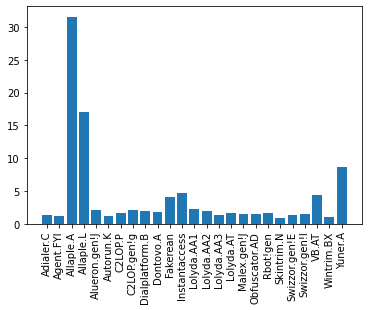

In [13]:
plt.xticks(rotation='vertical')
plt.bar(malware_fam,frecuencias)

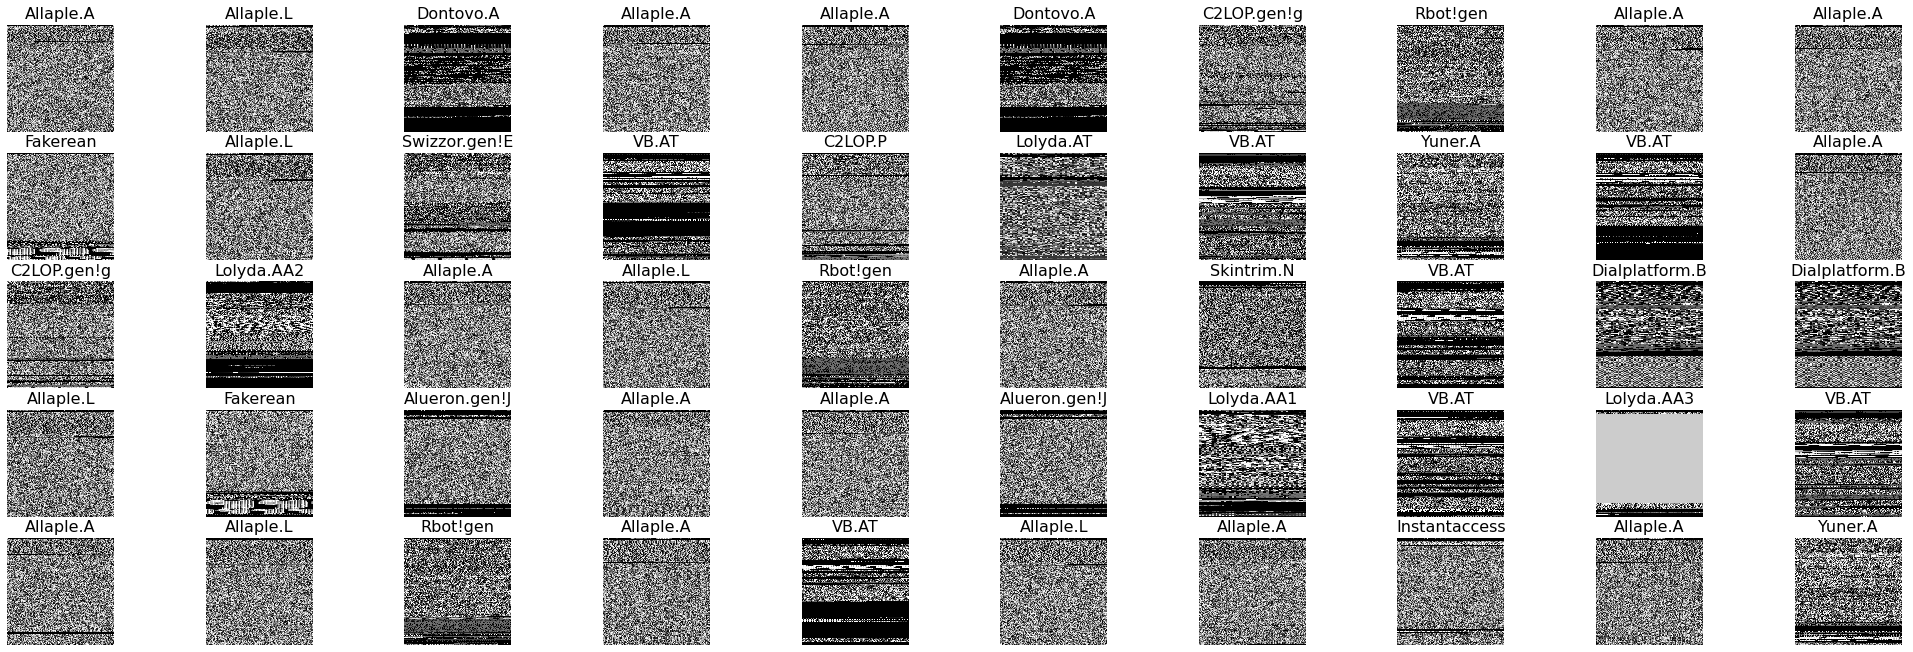

In [14]:
interp=False
if type(imgs_next[0]) is np.ndarray:
  imgs_next = np.array(imgs_next).astype(np.uint8)
  if (imgs_next.shape[-1] != 3):
    imgs_next = imgs_next.transpose((0,2,3,1))
f = plt.figure(figsize=(35,35))
for i in range(0,50):
  sp = f.add_subplot(15, 10, i+1)
  sp.axis('Off')
  if img_labels is not None:
    sp.set_title(list(imgs.class_indices.keys())[np.argmax(img_labels[i])], fontsize=16)
  plt.imshow(imgs_next[i], interpolation=None if interp else 'none')

In [15]:
features, test, target_features, target_test = train_test_split(imgs_next/255, img_labels, test_size=0.3)

In [16]:
features.shape

(6537, 128, 128, 3)

In [17]:
test.shape

(2802, 128, 128, 3)

In [18]:
target_features.shape

(6537, 25)

In [19]:
target_test.shape

(2802, 25)

# Modelo original

In [20]:
cnn = Sequential()

In [21]:
cnn.add(Conv2D(30, kernel_size=(3, 3), activation='relu', input_shape=(128,128,3)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))

cnn.add(Conv2D(32, (3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())
cnn.add(Dense(256, activation='relu'))
cnn.add(Dropout(0.5))

cnn.add(Dense(128, activation='relu'))
cnn.add(Dense(25, activation='softmax'))

In [22]:
cnn.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

In [23]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 126, 126, 30)      840       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 63, 63, 30)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 61, 61, 32)        8672      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 30, 30, 32)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 30, 30, 32)        0         
                                                                 
 flatten (Flatten)           (None, 28800)             0

In [24]:
cnn.fit(features, target_features, validation_data=(test, target_test), epochs=10)

Epoch 1/10
205/205 [==============================] - 138s 668ms/step - loss: 0.9923 - accuracy: 0.7138 - val_loss: 0.2937 - val_accuracy: 0.9079
Epoch 2/10
205/205 [==============================] - 135s 659ms/step - loss: 0.2605 - accuracy: 0.9195 - val_loss: 0.1930 - val_accuracy: 0.9447
Epoch 3/10
205/205 [==============================] - 137s 668ms/step - loss: 0.1773 - accuracy: 0.9454 - val_loss: 0.1575 - val_accuracy: 0.9511
Epoch 4/10
205/205 [==============================] - 136s 663ms/step - loss: 0.1430 - accuracy: 0.9562 - val_loss: 0.1648 - val_accuracy: 0.9468
Epoch 5/10
205/205 [==============================] - 136s 663ms/step - loss: 0.1200 - accuracy: 0.9631 - val_loss: 0.1499 - val_accuracy: 0.9525
Epoch 6/10
205/205 [==============================] - 136s 664ms/step - loss: 0.1066 - accuracy: 0.9679 - val_loss: 0.1545 - val_accuracy: 0.9579
Epoch 7/10
205/205 [==============================] - 139s 676ms/step - loss: 0.0954 - accuracy: 0.9693 - val_loss: 0.1353 -

In [25]:
cnn_scores = cnn.evaluate(test, target_test)

88/88 [==============================] - 21s 236ms/step - loss: 0.1304 - accuracy: 0.9607


# **Fast Gradient Method**

funcion para crear modelo

In [37]:
def load_model():
    cnn = keras.Sequential()
    cnn.add(keras.layers.Conv2D(30, kernel_size=(3, 3), activation='relu', input_shape=(128,128,3),padding='same'))
    cnn.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))

    cnn.add(keras.layers.Conv2D(32, (3, 3), activation='relu'))
    cnn.add(MaxPooling2D(pool_size=(2, 2)))
    cnn.add(Dropout(0.25))

    cnn.add(keras.layers.Flatten())
    cnn.add(keras.layers.Dense(256, activation='relu'))
    cnn.add(keras.layers.Dropout(0.5))

    cnn.add(keras.layers.Dense(128, activation='relu'))
    cnn.add(keras.layers.Dense(25, activation='softmax'))
    
    cnn.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])
    
    return cnn

In [39]:
tf.compat.v1.disable_eager_execution()
model = load_model()
model_ev_class = KerasClassifier(model=model)

In [51]:
x_test_pred = np.argmax(model_ev_class.predict(test), axis=1)
correct = np.sum(x_test_pred == np.argmax(target_test, axis=1))

In [54]:
print("correct: ",format(correct))
print("incorrect: ",format(len(test)-correct))

correct:  77
incorrect:  2725


Evasion

In [48]:
attacker = FastGradientMethod(model_ev_class, eps=10)
x_test_adv = attacker.generate(test)

In [55]:
x_test_adv_pred = np.argmax(model_ev_class.predict(x_test_adv), axis=1)
correct_adv = np.sum(x_test_adv_pred == np.argmax(target_test, axis=1))

In [58]:
print("correct: ",format(correct_adv))
print("incorrect: ",format(len(test)-correct_adv))

correct:  714
incorrect:  2088


In [89]:
def load_model():
    cnn = Sequential()
    cnn.add(keras.layers.Rescaling(1./255, input_shape=(128, 128, 3)))
    cnn.add(keras.layers.Conv2D(34,  kernel_size=(3, 3), activation='relu', input_shape=(128,128,3)))
    cnn.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    cnn.add(keras.layers.Conv2D(62, (3, 3), activation='relu'))
    cnn.add(keras.layers.MaxPooling2D(pool_size=(2, 2)))
    cnn.add(Flatten())
    cnn.add(Dense(1028, activation='relu'))
    cnn.add(Dense(25, activation='softmax'))
    
    cnn.compile(loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True), optimizer="adam",
                                                                  metrics=['accuracy'])
    
    return cnn

In [90]:
model_rob = load_model()

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


In [91]:
model_rob.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_6 (Rescaling)     (None, 128, 128, 3)       0         
                                                                 
 conv2d_27 (Conv2D)          (None, 126, 126, 34)      952       
                                                                 
 max_pooling2d_27 (MaxPoolin  (None, 63, 63, 34)       0         
 g2D)                                                            
                                                                 
 conv2d_28 (Conv2D)          (None, 61, 61, 62)        19034     
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 30, 30, 62)       0         
 g2D)                                                            
                                                                 
 flatten_12 (Flatten)        (None, 55800)           

In [92]:
model_rob.fit(features, target_features, validation_data=(test, target_test), epochs=10)

Train on 6537 samples, validate on 2802 samples
Epoch 1/10
6537/6537 [==============================] - ETA: 0s - loss: 2.4151 - accuracy: 0.3301

/usr/local/lib/python3.7/dist-packages/keras/engine/training_v1.py:2057: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  updates = self.state_updates


6537/6537 [==============================] - 285s 44ms/sample - loss: 2.4151 - accuracy: 0.3301 - val_loss: 1.8273 - val_accuracy: 0.4593
Epoch 2/10
6537/6537 [==============================] - 286s 44ms/sample - loss: 0.9234 - accuracy: 0.7041 - val_loss: 0.4721 - val_accuracy: 0.8804
Epoch 3/10
6537/6537 [==============================] - 282s 43ms/sample - loss: 0.3497 - accuracy: 0.9015 - val_loss: 0.2996 - val_accuracy: 0.9151
Epoch 4/10
6537/6537 [==============================] - 281s 43ms/sample - loss: 0.2292 - accuracy: 0.9328 - val_loss: 0.2256 - val_accuracy: 0.9350
Epoch 5/10
6537/6537 [==============================] - 283s 43ms/sample - loss: 0.1575 - accuracy: 0.9556 - val_loss: 0.3169 - val_accuracy: 0.9197
Epoch 6/10
6537/6537 [==============================] - 284s 43ms/sample - loss: 0.1300 - accuracy: 0.9627 - val_loss: 0.2108 - val_accuracy: 0.9400
Epoch 7/10
6537/6537 [==============================] - 283s 43ms/sample - loss: 0.0984 - accuracy: 0.9709 - val_loss

In [94]:
model_rob_scores = model_rob.evaluate(test, target_test)

In [95]:
print(model_rob_scores)

[0.17760355478095463, 0.9503926]


In [ ]:
tf.compat.v1.disable_eager_execution()
model_robusto = load_model()
model_ev_robusto_class = KerasClassifier(model=model_robusto)

In [ ]:
x_test_robusto_pred = np.argmax(model_ev_robusto_class.predict(test), axis=1)
correct_robusto = np.sum(x_test_pred == np.argmax(target_test, axis=1))